Midterm Project Code

In [1]:
from utilities import getDataFrame

%load_ext autoreload
%autoreload 2

In [2]:
url = "https://raw.githubusercontent.com/BlakeRivers25/SCDV490-FinalProject-BlakeRivers/main/Data%20Sets/county_census_and_election_result.csv"
df = getDataFrame(url)

In [3]:
print ("County and Census Data:")
df

County and Census Data:


,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7521,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,42.3,1.4,WI,SHEBOYGAN,27101.0,2.0,896.0,403.0,37609.0,1.0
7522,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,37.6,0.8,WI,WALWORTH,22789.0,15.0,641.0,304.0,33851.0,1.0
7523,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,37.3,2.0,WI,WAUKESHA,103906.0,54.0,3023.0,1364.0,159649.0,1.0
7524,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,41.5,1.6,WI,WINNEBAGO,44060.0,38.0,1629.0,509.0,47796.0,1.0


Cleaning Up The Datsets

In [87]:
import matplotlib.pylab as plt
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import utilities
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Income

In [5]:
infilename = "Data Sets/2000 Income Cleaned.csv"
df2000Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2000')

print('2000 Income Dataframe')
df2000Income

2000 Income Dataframe


,State,# of households,0-10000,10000-15000,15000-25000,25000-35000,35000-50000,50000-75000,75000-100000,100000-150000,150000-200000,200000-100000000,Median,Mean
0,Alabama,1737385,250526,140880,257393,236732,286612,298347,134135,85987,22171,24602,34135,46719
1,Alaska,221804,12458,10995,22917,25025,35519,48912,30371,25381,6078,4148,51571,57171
2,Arizona,1901625,163221,120770,264392,265645,332857,365024,184026,131068,35926,38696,40558,52835
3,Arkansas,1042807,139262,89901,174093,156910,182881,170245,67095,39574,10118,12728,32182,42936
4,California,11512020,967089,648780,1318246,1315085,1745961,2202873,1326569,1192618,385248,409551,47493,64725
5,Colorado,1659308,114658,82584,185997,208982,281889,351663,197339,150572,42707,42917,47203,59313
6,Connecticut,1302227,91721,64895,126157,130916,188021,265470,172569,152405,48533,61540,53935,74838
7,Delaware,298755,21125,15284,33898,36361,50582,63663,35968,28145,7549,6180,47381,59142
8,District of Columbia,248590,36939,14594,28443,30592,35311,39553,22437,20790,8292,11639,40127,64401
9,Florida,6341121,606995,427050,918455,901454,1103554,1170569,552379,398860,114432,147373,38819,51993


In [6]:
infilename = "Data Sets/2010 Income Cleaned.csv"
df2010Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2010')

print('2010 Income Dataframe')
df2010Income

2010 Income Dataframe


,State,# of households,0-10000,10000-15000,15000-25000,25000-35000,35000-50000,50000-75000,75000-100000,100000-150000,150000-200000,200000-100000000,Median,Mean
0,Alabama,1815152.0,196036.416,134321.248,248675.824,216003.088,275903.104,308575.840,177884.896,163363.680,54454.560,38118.192,40474.0,55778.0
1,Alaska,254610.0,10693.620,11712.060,20623.410,22660.290,31062.420,48630.510,33863.130,45829.800,16295.040,12985.110,64576.0,81290.0
2,Arizona,2334050.0,186724.000,135374.900,268415.750,277751.950,361777.750,438801.400,263747.650,256745.500,77023.650,70021.500,46789.0,62838.0
3,Arkansas,1114902.0,109260.396,85847.454,165005.496,152741.574,175039.614,190648.242,104800.788,86962.356,24527.844,20068.236,38307.0,52382.0
4,California,12406475.0,744388.500,669949.650,1265460.450,1153802.175,1612841.750,2171133.125,1525996.425,1774125.925,756794.975,744388.500,57708.0,79465.0
5,Colorado,1960585.0,133319.780,99989.835,201940.255,198019.085,274481.900,360747.640,248994.295,266639.560,94108.080,84305.155,54046.0,72423.0
6,Connecticut,1358809.0,78810.922,59787.596,122292.810,111422.338,168492.316,230997.530,180721.597,211974.204,91040.203,103269.484,64032.0,90074.0
7,Delaware,328765.0,19725.900,15451.955,33205.265,31561.440,45698.335,64437.940,43396.980,47013.395,16109.485,11835.540,55847.0,72550.0
8,District of Columbia,252388.0,26248.352,13881.340,20443.428,19433.876,26500.740,39624.916,29024.620,33062.828,17919.548,25995.964,60903.0,92959.0
9,Florida,7035068.0,583910.644,443209.284,886418.568,858278.296,1104505.676,1287417.444,752752.276,675366.528,218087.108,218087.108,44409.0,61877.0


In [7]:
infilename = "Data Sets/2020 Income Cleaned.csv"
df2020Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2020')

print('2020 Income Dataframe')
df2020Income

2020 Income Dataframe


,State,# of households,0-10000,10000-15000,15000-25000,25000-35000,35000-50000,50000-75000,75000-100000,100000-150000,150000-200000,200000-100000000,Median,Mean
0,Alabama,1888504.0,152968.824,105756.224,205846.936,198292.920,249282.528,330488.200,222843.472,247394.024,92536.696,83094.176,52035.0,71964.0
1,Alaska,255173.0,9696.574,7400.017,15820.726,17096.591,25772.473,46696.659,36234.566,49248.389,24496.608,22455.224,77790.0,98811.0
2,Arizona,2643430.0,155962.370,97806.910,227334.980,237908.700,351576.190,491677.980,348932.760,396514.500,161249.230,169179.520,61529.0,84380.0
3,Arkansas,1170544.0,86620.256,65550.464,139294.736,132271.472,165046.704,215380.096,135783.104,136953.648,46821.760,46821.760,49475.0,69357.0
4,California,13103114.0,615846.358,511021.446,904114.866,930321.094,1310311.400,2004776.442,1611683.022,2240632.494,1231692.716,1742714.162,78672.0,111622.0
5,Colorado,2137402.0,96183.090,66259.462,141068.532,153892.944,235114.220,371907.948,290686.672,389007.164,185953.974,205190.592,75231.0,100933.0
6,Connecticut,1385437.0,67886.413,47104.858,94209.716,95595.153,138543.700,213357.298,169023.314,243836.912,133001.952,182877.684,79855.0,115337.0
7,Delaware,370953.0,19289.556,12983.355,25224.804,33014.817,43401.501,65658.681,51562.467,63062.010,28563.381,28192.428,69110.0,92308.0
8,District of Columbia,288307.0,24217.788,11243.973,15568.578,15856.885,20758.104,35750.068,30560.542,47282.348,29695.621,57084.786,90842.0,133587.0
9,Florida,7931313.0,491741.406,333115.146,737612.109,785199.987,1094521.194,1451430.279,991414.125,1086589.881,444153.528,507604.032,57703.0,83104.0


Population and Demographics

In [8]:
infilename = "Data Sets/2000 Population Cleaned.csv"

df2000Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2000')

print('2000 Demographics Dataframe')
df2000Demographics

2000 Demographics Dataframe


,State,Population,Male,Female,Under 5 yrs,5-9 yrs,10-14 yrs,15-19 yrs,20-24 yrs,25-34 yrs,35-44 yrs,45-54 yrs,55-59 yrs,60-64 yrs,65-74 yrs,75-84 yrs,85 yrs and Older,Median Age,18 yrs and Older,65 yrs and Older
0,Alabama,4447100.0,2144463.0,2302637.0,294822.0,316510.0,321569.0,318972.0,307827.0,599226.0,695484.0,597378.0,224863.0,190421.0,320068.0,193926.0,66034.0,36.0,3324488.0,580028.0
1,Alaska,626932.0,324282.0,302650.0,47192.0,53917.0,56962.0,49128.0,40177.0,89209.0,115694.0,94881.0,27655.0,17024.0,21980.0,10424.0,2689.0,32.5,436425.0,35093.0
2,Arizona,5130632.0,2556483.0,2574149.0,377908.0,394937.0,378451.0,360694.0,362458.0,739977.0,783041.0,626685.0,236416.0,202458.0,365677.0,234025.0,67905.0,34.3,3767931.0,667607.0
3,Arkansas,2673400.0,1303332.0,1370068.0,181195.0,188092.0,192450.0,195853.0,184610.0,348762.0,403648.0,348640.0,138501.0,116920.0,199719.0,129258.0,45752.0,36.2,1993342.0,374729.0
4,California,33871648.0,16843062.0,17028586.0,2455019.0,2747129.0,2593337.0,2405498.0,2371765.0,5168768.0,5643068.0,4312838.0,1445026.0,1142406.0,1897726.0,1273333.0,415735.0,33.5,24650185.0,3586794.0
5,Colorado,4301261.0,2163954.0,2137307.0,294976.0,309081.0,311835.0,303568.0,305169.0,664455.0,745402.0,613007.0,194850.0,143136.0,227495.0,141125.0,47162.0,34.4,3204471.0,415782.0
6,Connecticut,3405565.0,1648523.0,1757042.0,221051.0,244185.0,244079.0,213211.0,187422.0,448837.0,589524.0,479639.0,176720.0,131610.0,231882.0,173942.0,63463.0,37.5,2565991.0,469287.0
7,Delaware,783600.0,380003.0,403597.0,51222.0,56014.0,55703.0,54526.0,51477.0,107935.0,129563.0,103779.0,39628.0,32083.0,56733.0,34539.0,10398.0,36.1,589638.0,101670.0
8,District of Columbia,572059.0,268827.0,303232.0,32401.0,34799.0,30442.0,37776.0,52106.0,101063.0,88584.0,75293.0,27578.0,21929.0,36333.0,25233.0,8522.0,34.7,457727.0,70088.0
9,Florida,15982378.0,7787742.0,8194636.0,938775.0,1035889.0,1060724.0,996231.0,926114.0,2063668.0,2538012.0,2062742.0,819416.0,734670.0,1458257.0,1021715.0,326165.0,38.8,12347806.0,2806137.0


In [9]:
infilename = "Data Sets/2010 Population and Demographics Cleaned.csv"

df2010Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2010')

print('2010 Demographics Dataframe')
df2010Demographics

2010 Demographics Dataframe


,State,Population,Male,Female,Under 5 yrs,5-9 yrs,10-14 yrs,15-19 yrs,20-24 yrs,25-34 yrs,...,85 yrs and Older,Median Age,18 yrs and Older,65 yrs and Older,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race
0,Alabama,4785298.0,2322243.0,2463055.0,308069.0,309658.0,318460.0,348077.0,339513.0,601653.0,...,75444.0,37.8,3649870.0,657974.0,3382838.0,1290667.0,56024.0,64811.0,2500.0,56447.0
1,Alaska,713985.0,372436.0,341549.0,53582.0,49870.0,52372.0,51610.0,55974.0,103690.0,...,4072.0,33.8,525600.0,53339.0,526642.0,33121.0,137943.0,50131.0,12315.0,9173.0
2,Arizona,6413737.0,3190700.0,3223037.0,455776.0,448623.0,457339.0,460186.0,445055.0,859440.0,...,104926.0,35.9,4781326.0,886795.0,5242273.0,312920.0,333890.0,227244.0,23994.0,454796.0
3,Arkansas,2921606.0,1430837.0,1490769.0,194451.0,195858.0,201519.0,210433.0,199923.0,368047.0,...,52769.0,37.3,2210476.0,420075.0,2336002.0,480407.0,42959.0,38999.0,7764.0,67397.0
4,California,37349363.0,18570505.0,18778858.0,2528898.0,2536654.0,2578286.0,2825690.0,2782635.0,5323453.0,...,614093.0,35.2,28042134.0,4269495.0,24611291.0,2649422.0,670960.0,5540174.0,289873.0,5301856.0
5,Colorado,5049071.0,2531362.0,2517709.0,342277.0,354521.0,330545.0,343494.0,350189.0,728299.0,...,71838.0,36.0,3820393.0,551638.0,4359904.0,247808.0,108671.0,190340.0,16697.0,317772.0
6,Connecticut,3577073.0,1738918.0,1838155.0,201685.0,222475.0,241092.0,249494.0,227944.0,421750.0,...,87614.0,40.0,2761785.0,508153.0,2872261.0,402971.0,29836.0,155442.0,2609.0,212833.0
7,Delaware,899769.0,436608.0,463161.0,56095.0,56077.0,56954.0,67720.0,62144.0,110516.0,...,16373.0,38.8,693700.0,129470.0,654859.0,203620.0,8641.0,33185.0,1794.0,21762.0
8,District of Columbia,604453.0,285729.0,318724.0,32861.0,27268.0,23969.0,42688.0,60843.0,126322.0,...,10677.0,33.9,503186.0,69427.0,251526.0,315243.0,5425.0,25999.0,807.0,18815.0
9,Florida,18843326.0,9212548.0,9630778.0,1067986.0,1081390.0,1138125.0,1230917.0,1247729.0,2270950.0,...,447550.0,40.7,14843807.0,3273199.0,14743216.0,3195360.0,157703.0,564551.0,34031.0,587749.0


In [10]:
infilename = "Data Sets/2020 Population and Demographics Cleaned.csv"

df2020Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2020')

print('2020 Demographics Dataframe')
df2020Demographics

2020 Demographics Dataframe


,State,Population,Male,Female,Under 5 yrs,5-9 yrs,10-14 yrs,15-19 yrs,20-24 yrs,25-34 yrs,...,85 yrs and Older,Median Age,18 yrs and Older,65 yrs and Older,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race
0,Alabama,4893186.0,2365734.0,2527452.0,293932.0,294776.0,315204.0,321308.0,323960.0,641867.0,...,88625.0,39.2,3800274.0,827434.0,3302834.0,1301319.0,24764.0,67909.0,2042.0,74996.0
1,Alaska,736990.0,384653.0,352337.0,52302.0,52825.0,49395.0,46257.0,52775.0,118606.0,...,6881.0,34.6,553631.0,87629.0,466961.0,23894.0,107298.0,47289.0,10485.0,12231.0
2,Arizona,7174064.0,3564979.0,3609085.0,431224.0,444859.0,482609.0,478165.0,491151.0,986787.0,...,140385.0,37.9,5534419.0,1262204.0,5292498.0,325105.0,311014.0,239190.0,14633.0,492027.0
3,Arkansas,3011873.0,1478511.0,1533362.0,188445.0,194331.0,200291.0,200952.0,201132.0,394792.0,...,59623.0,38.3,2309041.0,510117.0,2269959.0,457840.0,19146.0,46130.0,10455.0,88363.0
4,California,39346023.0,19562882.0,19783141.0,2409082.0,2431647.0,2597443.0,2548072.0,2694636.0,6007913.0,...,764744.0,36.7,30389382.0,5644497.0,22053721.0,2250962.0,311629.0,5834312.0,149636.0,5623747.0
5,Colorado,5684926.0,2862153.0,2822773.0,330939.0,348555.0,364153.0,362041.0,378484.0,892273.0,...,93428.0,36.9,4425895.0,808337.0,4634305.0,235692.0,53671.0,181733.0,8883.0,233413.0
6,Connecticut,3570549.0,1741688.0,1828861.0,182708.0,192321.0,221648.0,241286.0,243381.0,443917.0,...,94150.0,41.1,2834965.0,615466.0,2649994.0,382161.0,9079.0,163262.0,1189.0,192217.0
7,Delaware,967679.0,467720.0,499959.0,54774.0,55329.0,59081.0,60143.0,58482.0,128726.0,...,18843.0,41.0,763472.0,182024.0,652587.0,212795.0,3560.0,38528.0,705.0,21937.0
8,District of Columbia,701974.0,333137.0,368837.0,44913.0,35069.0,30443.0,36863.0,52700.0,163898.0,...,11270.0,34.1,575926.0,85912.0,288306.0,318631.0,2438.0,28762.0,328.0,33764.0
9,Florida,21216924.0,10374594.0,10842330.0,1133390.0,1133024.0,1221553.0,1209024.0,1264607.0,2766491.0,...,578144.0,42.2,17002480.0,4347912.0,15199588.0,3381061.0,55655.0,590668.0,13339.0,699596.0


Status Report 2 Graphs

In [47]:
#Male2020Demo = df2020Demographics.loc[df2020Demographics['State'] == 'New York']
Male2020Demo = df2020Demographics['Male']
Pop2020Demo = df2020Demographics['Population']

AvgMalPop2020 = Male2020Demo/Pop2020Demo
#AvgMalPop2020

In [58]:
Male2000Demo = df2000Demographics.loc[df2000Demographics['State'] == 'New York']
Male2000Demo = Male2000Demo[['Male', 'Female']]
Male2000Demo

,Male,Female
32,9134254.0,9842203.0


In [57]:
Male2010Demo = df2010Demographics.loc[df2010Demographics['State'] == 'New York']
Male2010Demo = Male2010Demo[['Male', 'Female']]
Male2010Demo

,Male,Female
32,9387534.0,10004749.0


In [36]:
Male2020Demo = df2020Demographics.loc[df2020Demographics['State'] == 'New York']
Male2020Demo = Male2020Demo[['Male', 'Female']]
Male2020Demo

,Male,Female
32,9474184.0,10040665.0


In [46]:
NYGender = {'Year': [2000, 2010, 2020],
            'Male': [9134254.0, 9387534.0, 9474184.0],
            'Female': [9842203.0, 10004749.0, 10040665.0]}
NYGenderDF = pd.DataFrame(NYGender)

NYMale = NYGenderDF['Male']
NYFemale = NYGenderDF['Female']

NYGenderDF

,Year,Male,Female
0,2000,9134254.0,9842203.0
1,2010,9387534.0,10004749.0
2,2020,9474184.0,10040665.0


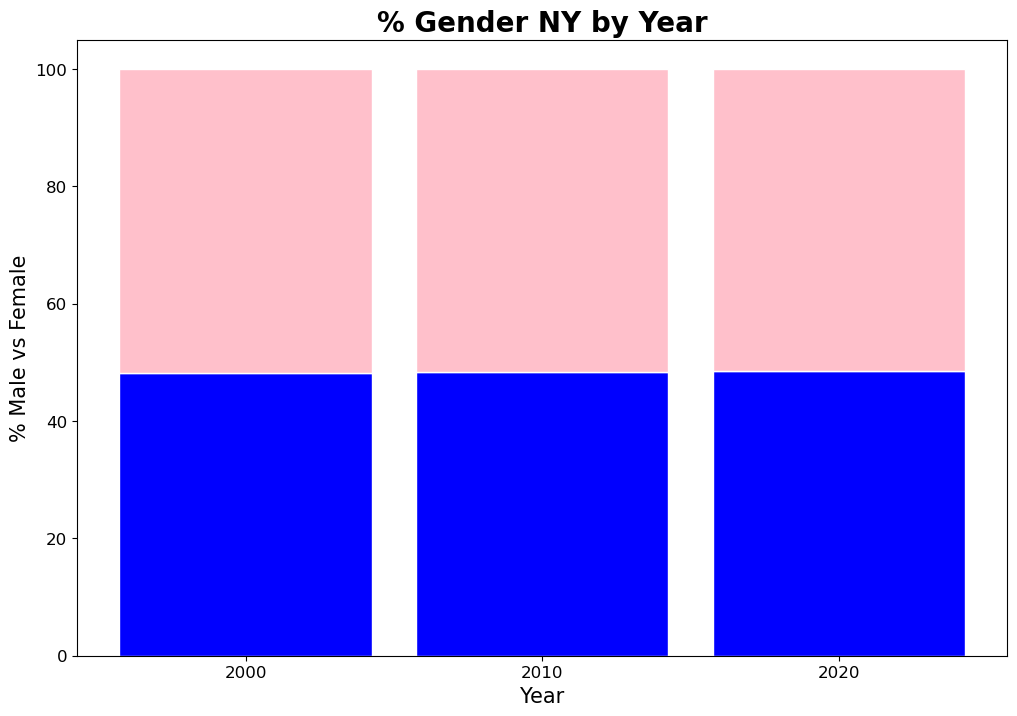

In [43]:
fig = plt.subplots(figsize =(12, 8))
r = [0,1,2]

# From raw value to percentage
totals = [i+j for i,j in zip(NYMale, NYFemale)]
blueBars = [i / j * 100 for i,j in zip(NYMale, totals)] #Male
pinkBars = [i / j * 100 for i,j in zip(NYFemale, totals)] #Female


# plot
barWidth = 0.85
names = ('2000','2010','2020')
# Create blue 'Male' Bars
plt.bar(r, blueBars, color='blue', edgecolor='white', width=barWidth)
# Create pink 'Female' Bars
plt.bar(r, pinkBars, bottom=blueBars, color='pink', edgecolor='white', width=barWidth)

 
# Custom x axis
plt.xticks(r, names, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('% Gender NY by Year', fontweight ='bold', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('% Male vs Female', fontsize = 15)
 
# Show graphic
plt.show()

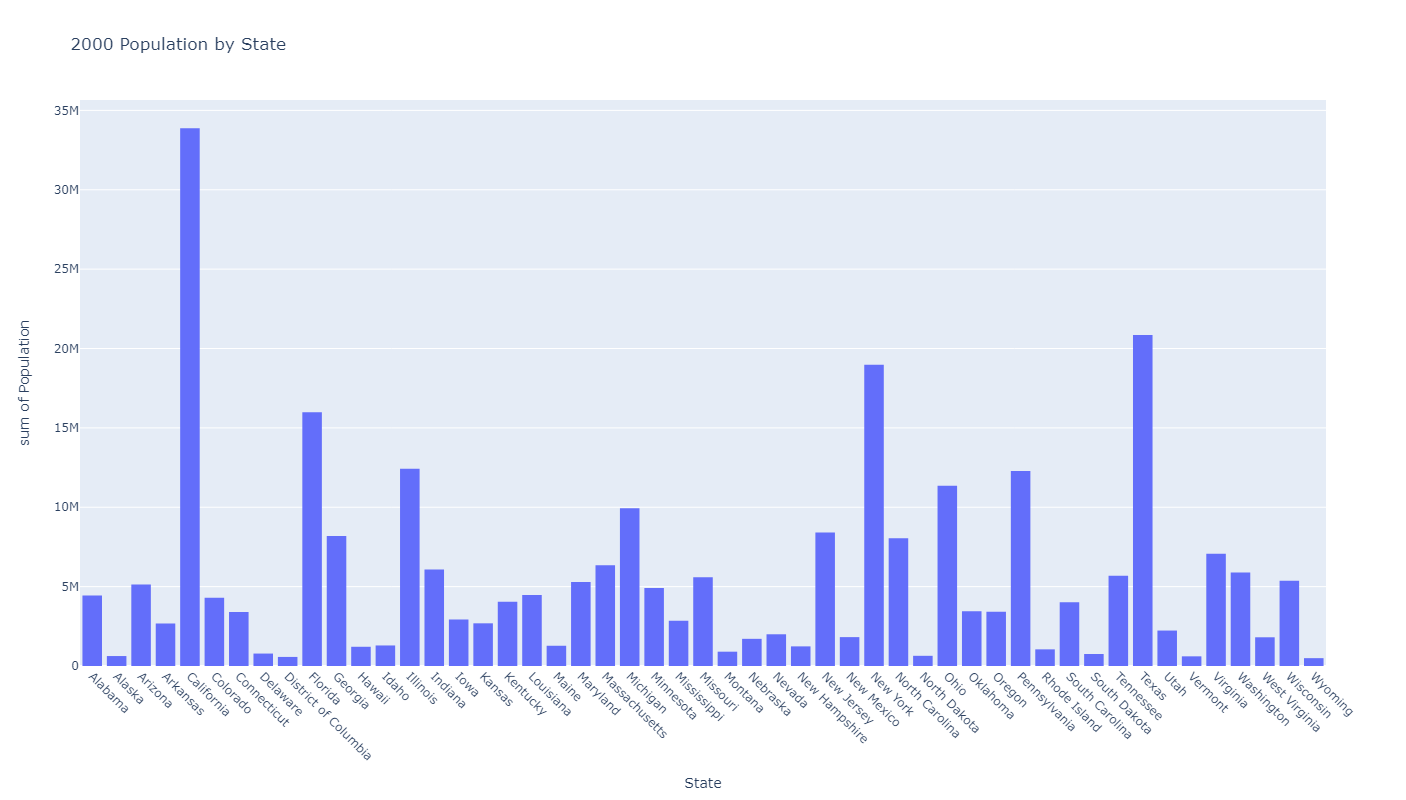

In [101]:
Pop2000 = df2000Demographics[['State', 'Population']]
#print(Pop2000)
Pop2000State = Pop2000['State']
Pop2000Pop = Pop2000['Population']

plt = px.histogram(Pop2000, x="State", y="Population", title = "2000 Population by State", 
                   width = 1200, height = 800)
plt.update_xaxes(tickangle=45)
plt.show()

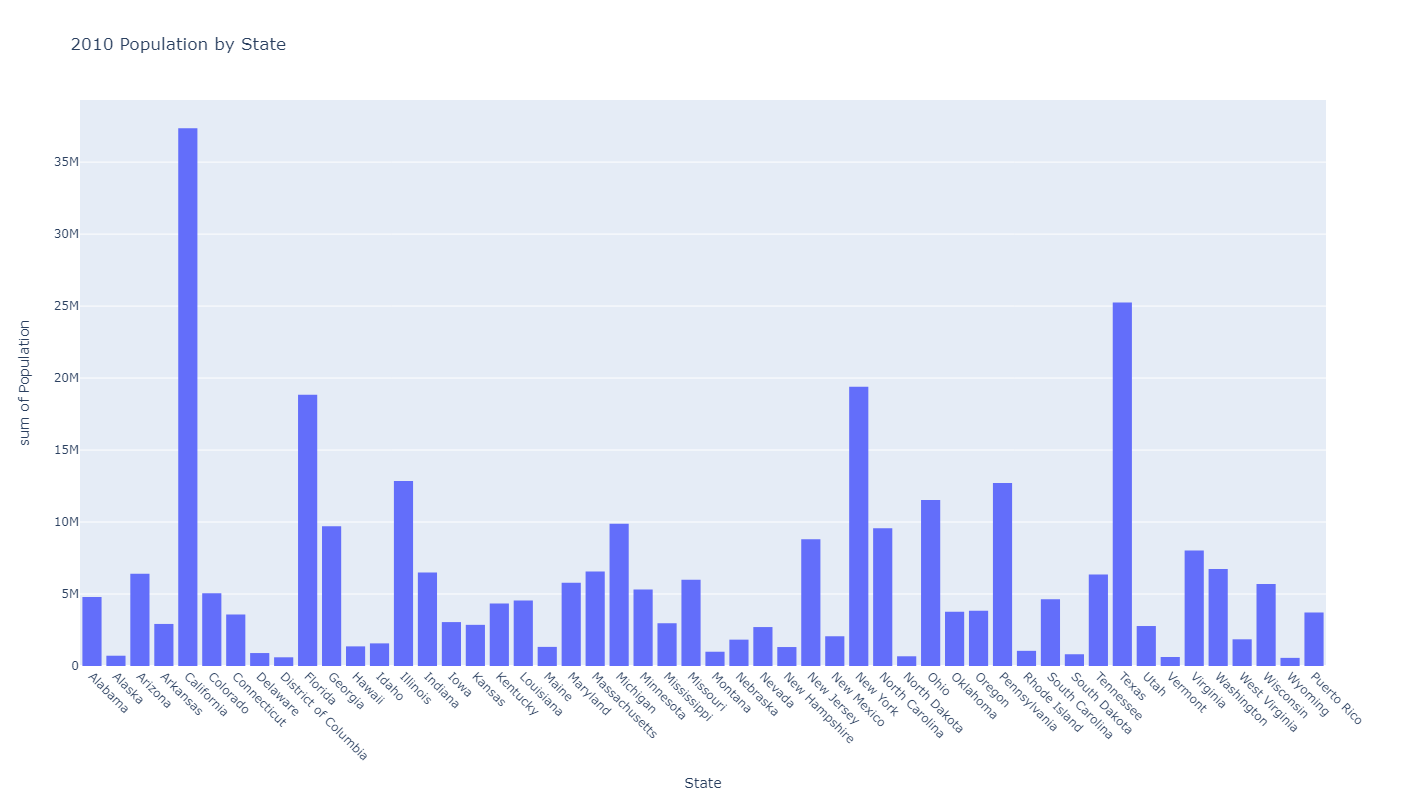

In [103]:
Pop2010 = df2010Demographics[['State', 'Population']]
#print(Pop2010)
Pop2010State = Pop2010['State']
Pop2010Pop = Pop2010['Population']

plt = px.histogram(Pop2010, x="State", y="Population", title = "2010 Population by State", 
                   width = 1200, height = 800)
plt.update_xaxes(tickangle=45)
plt.show()

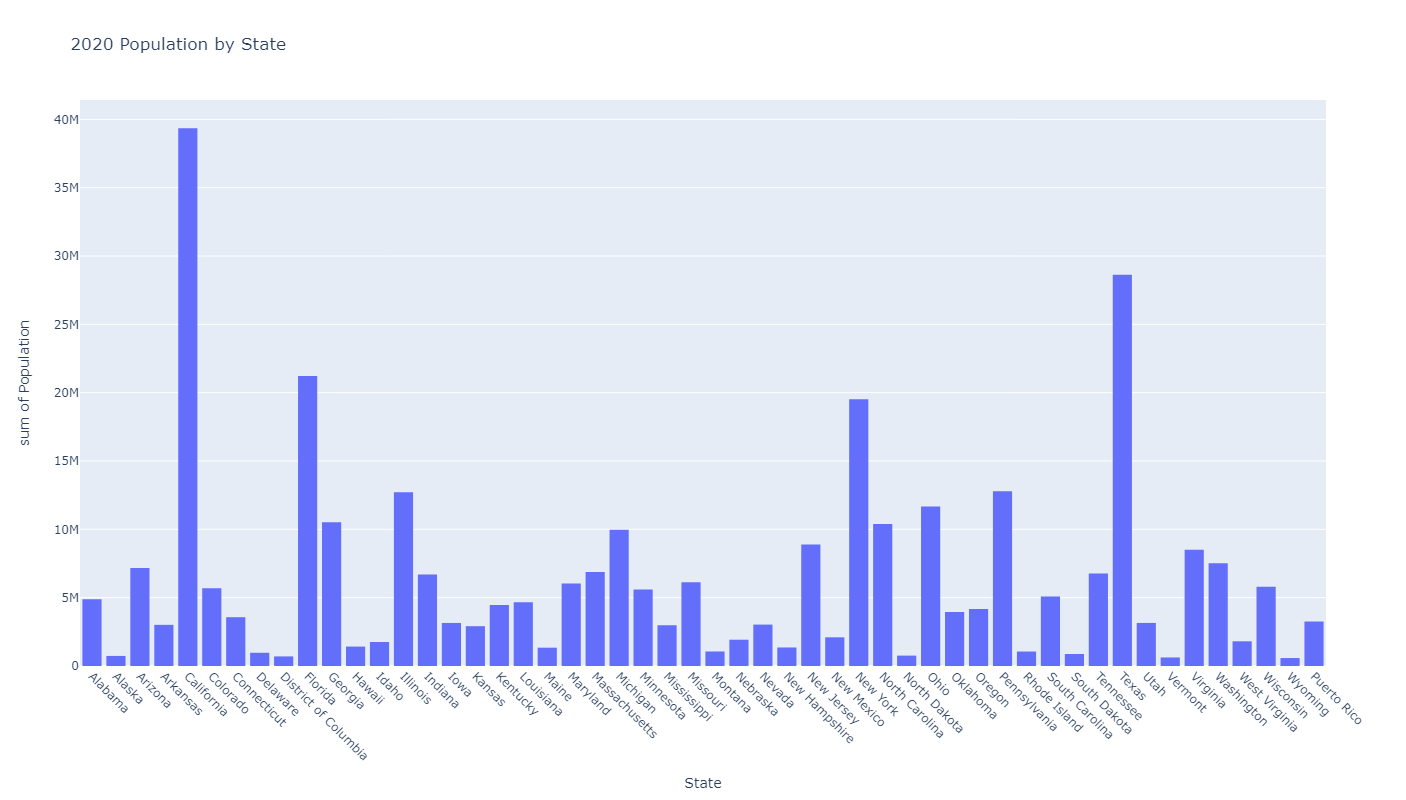

In [105]:
Pop2020 = df2020Demographics[['State', 'Population']]
#print(Pop2020)
Pop2020State = Pop2020['State']
Pop2020Pop = Pop2020['Population']

plt = px.histogram(Pop2020, x="State", y="Population", title = "2020 Population by State", 
                   width = 1200, height = 800)
plt.update_xaxes(tickangle=45)
plt.show()